In [46]:
# imports
import os
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from pydataset import data

# for scalers at least
from env import get_db_url
import wrangle_zillow as w

# Exercises

### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.


In [47]:
def get_iris():
    df = data('iris')
    # Rename column 'Sepal.Length' to 'sepal_length'
    return df.rename(columns={'Sepal.Length': 'sepal_length','Sepal.Width':'sepal_width','Petal.Length':'petal_length','Petal.Width':'petal_width'})
df = get_iris()
train,val,test = w.split_data(df)
train.head()

sepal_length  sepal_width  petal_length  petal_width     Species
123           7.7          2.8           6.7          2.0   virginica
3             4.7          3.2           1.3          0.2      setosa
67            5.6          3.0           4.5          1.5  versicolor
108           7.3          2.9           6.3          1.8   virginica
115           5.8          2.8           5.1          2.4   virginica

In [48]:
X = train[['petal_length','petal_width']]
km = KMeans(n_clusters=3,random_state=42)
km.fit(X)
train['cluster'] = km.predict(X)
train.head()

sepal_length  sepal_width  petal_length  petal_width     Species  cluster
123           7.7          2.8           6.7          2.0   virginica        0
3             4.7          3.2           1.3          0.2      setosa        1
67            5.6          3.0           4.5          1.5  versicolor        2
108           7.3          2.9           6.3          1.8   virginica        0
115           5.8          2.8           5.1          2.4   virginica        0

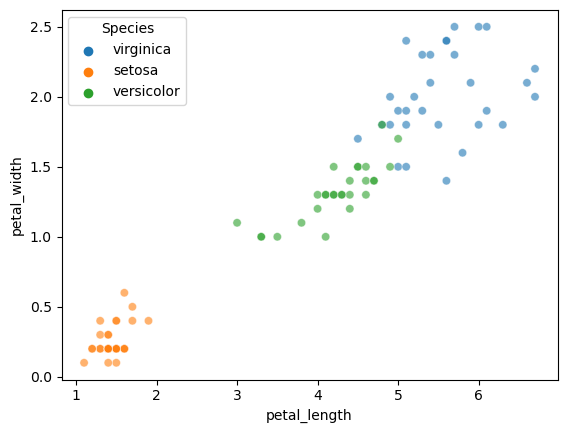

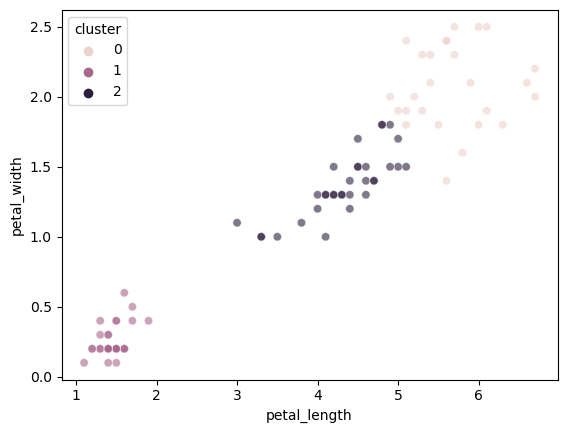

In [49]:
sns.scatterplot(data=train, x='petal_length', y='petal_width', alpha=.6, hue='Species')
plt.show()
sns.scatterplot(data=train, x='petal_length', y='petal_width', alpha=.6, hue='cluster')
plt.show()

Text(0.5, 1.0, 'inertia change as k incr')

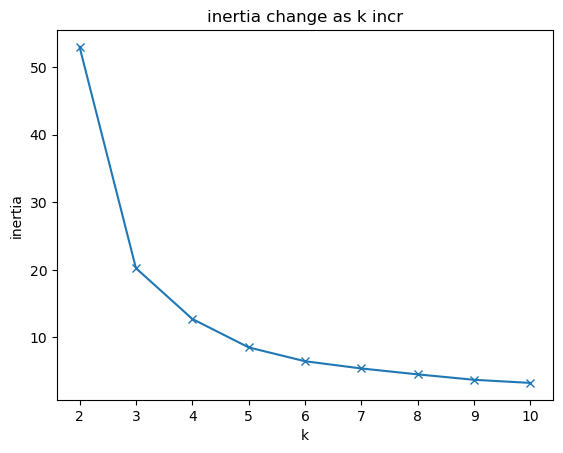

In [50]:
pd.Series({k:KMeans(k,random_state=42).fit(X).inertia_ for k in range(2,11)}).plot(marker='x')
plt.xticks(range(2,11))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('inertia change as k incr')

- Repeat the clustering, this time with 3 different features.


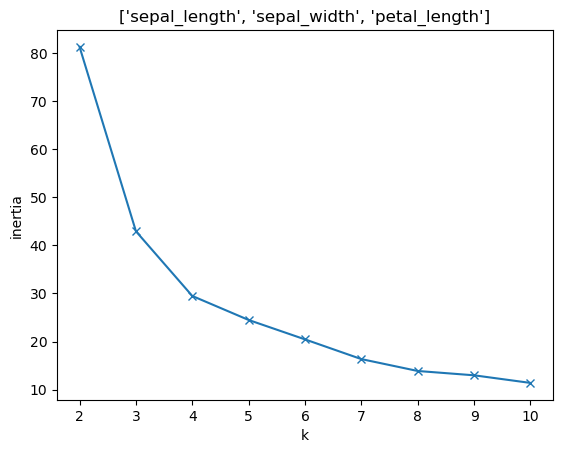

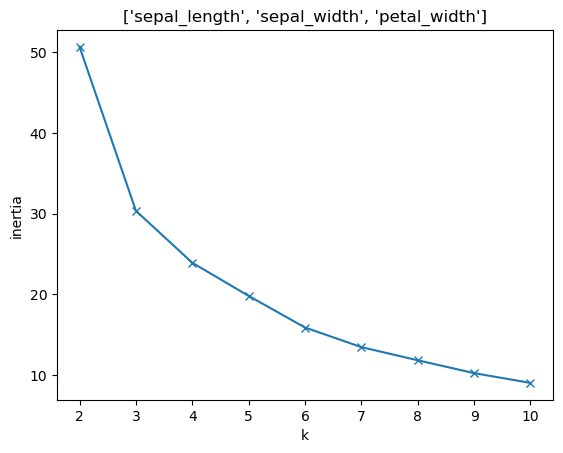

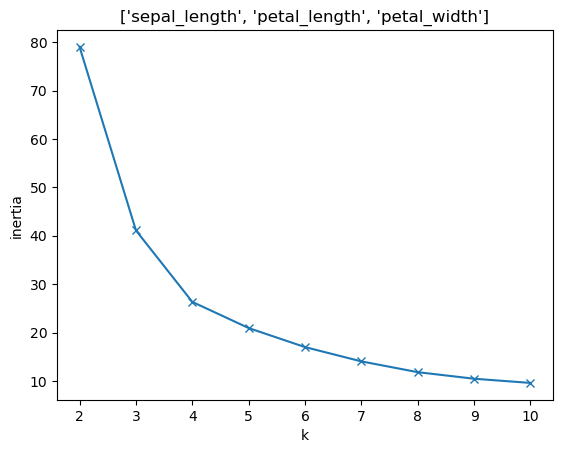

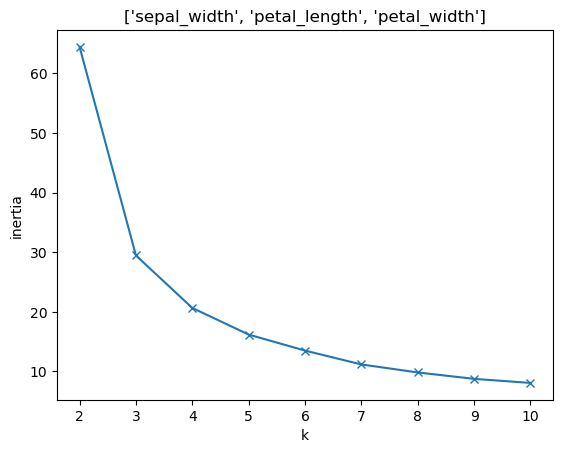

In [51]:
for feature in itertools.combinations(train.drop(columns=['Species','cluster']).columns,3):
    f = list(feature)
    pd.Series({k:KMeans(k,random_state=42).fit(train[f]).inertia_ for k in range(2,11)}).plot(marker='x')
    plt.xticks(range(2,11))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title(f)
    plt.show()

In [52]:
KMeans(n_clusters=3,random_state=42).fit(train[['sepal_length','sepal_width','petal_width']]).inertia_

30.356165621266424

In [53]:
KMeans(n_clusters=3,random_state=42).fit(train[['sepal_width','petal_length','petal_width']]).inertia_

29.447304147465438

- Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [54]:
def get_mall():
    """
    This function acquires data from a SQL database of mal customers and caches it locally.
    
    :param user: The username for accessing the MySQL database
    :param password: The password is unique per user saved in env
    :param host: The host parameter is the address of the server where the mall_customers database is hosted
    :return: The function `get_mall` is returning a dirty pandas DataFrame
    """
    # name of cached csv
    filename = 'mall.csv'
    # if cached data exist
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    # wrangle from sql db if not cached
    else:
        # read sql query into df
        df = pd.read_sql('''
                        select *
                        from customers
                        '''
                        , get_db_url('mall_customers')
                        )
        # cache data locally
        df.to_csv(filename, index=False)
    return df

In [55]:
df = get_mall()
df = pd.get_dummies(df, columns=['gender'],drop_first=True)
df = df.drop(columns=['customer_id'])
df

age  annual_income  spending_score  gender_Male
0     19             15              39            1
1     21             15              81            1
2     20             16               6            0
3     23             16              77            0
4     31             17              40            0
..   ...            ...             ...          ...
195   35            120              79            0
196   45            126              28            0
197   32            126              74            1
198   32            137              18            1
199   30            137              83            1

[200 rows x 4 columns]

In [56]:
train,val,test = w.split_data(df)
train.head()

age  annual_income  spending_score  gender_Male
42    48             39              36            1
157   30             78              78            0
155   27             78              89            0
3     23             16              77            0
99    20             61              49            1

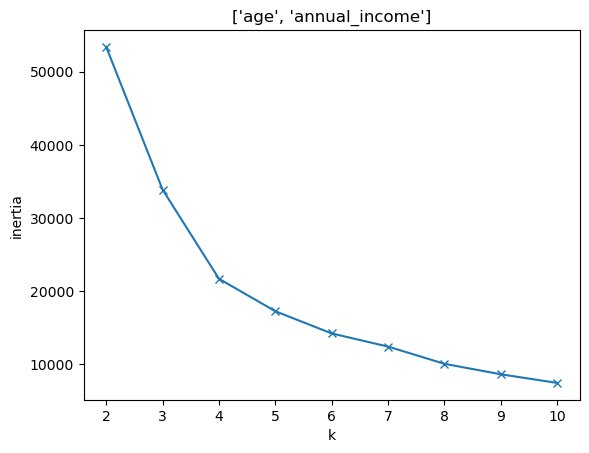

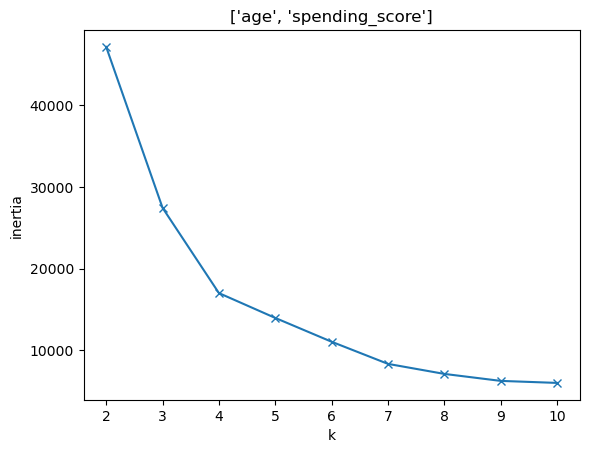

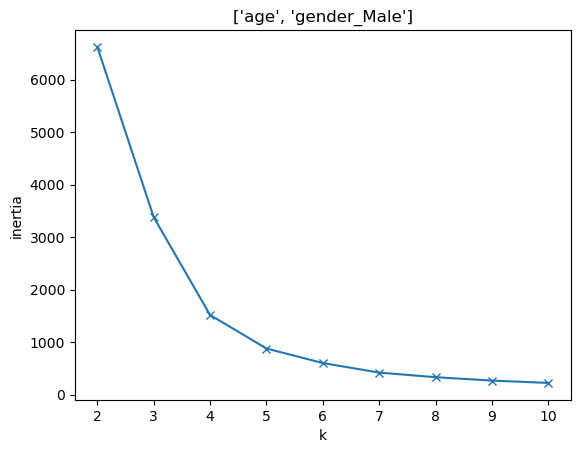

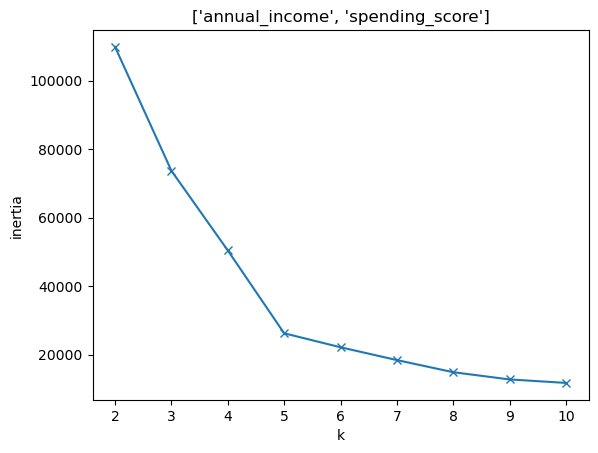

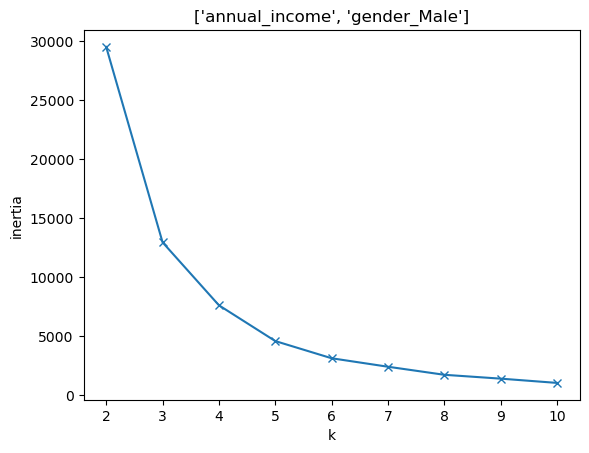

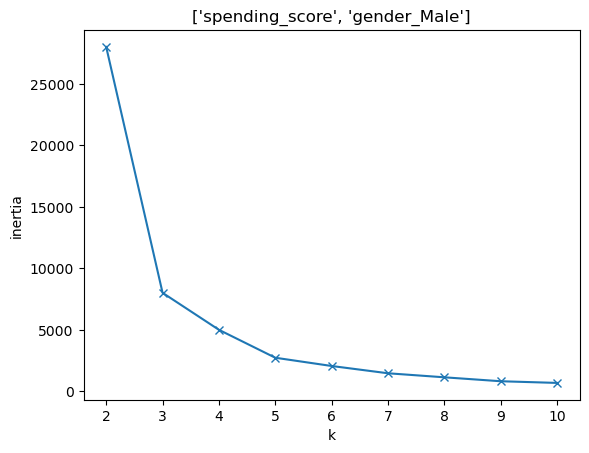

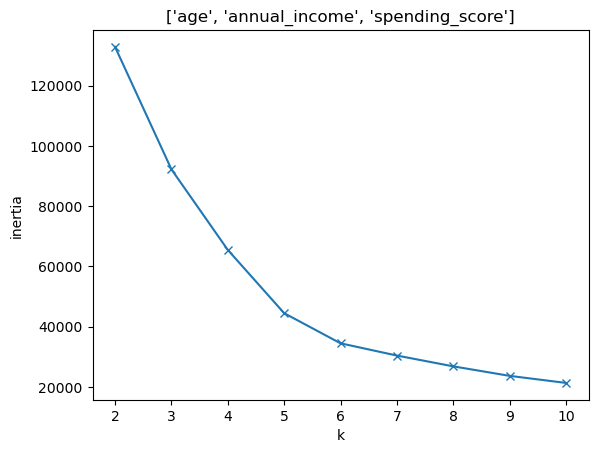

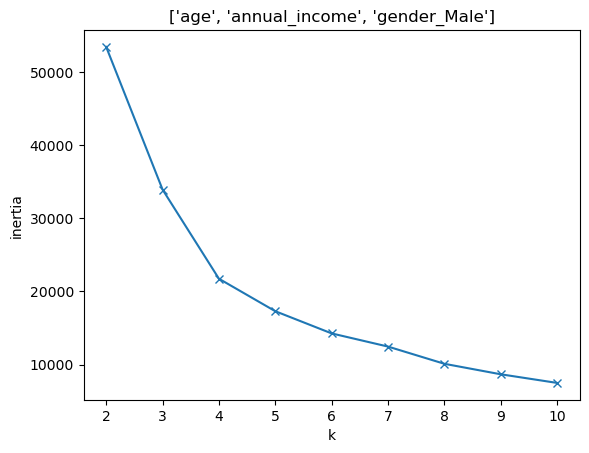

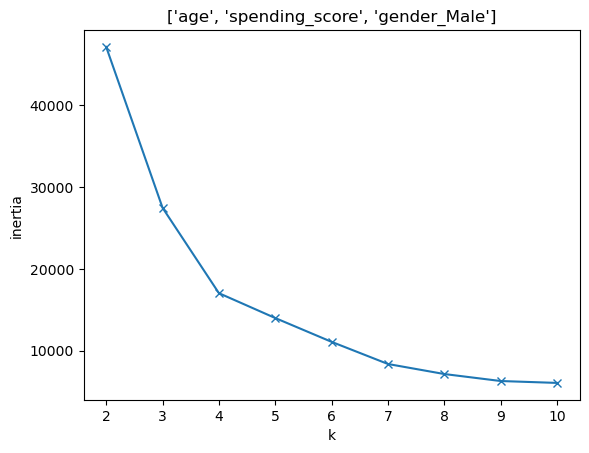

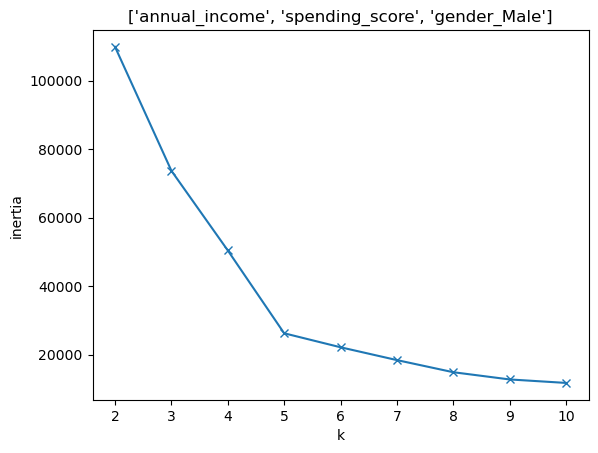

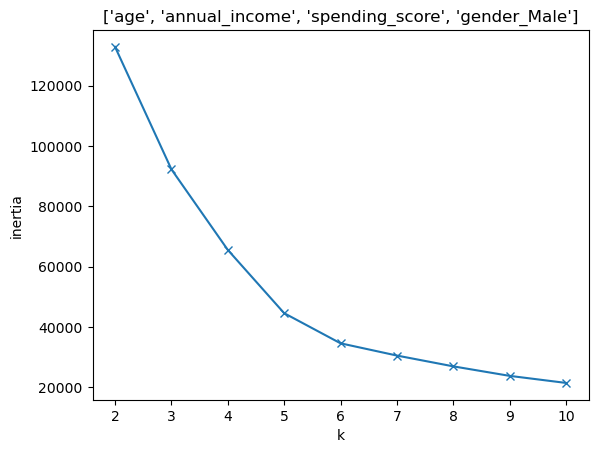

In [57]:
for r in range(2,5):
    for feature in itertools.combinations(train.columns,r):
        f = list(feature)
        pd.Series({k:KMeans(k,random_state=42).fit(train[f]).inertia_ for k in range(2,11)}).plot(marker='x')
        plt.xticks(range(2,11))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title(f)
        plt.show()

In [58]:
X = train[['age','gender_Male']]
km = KMeans(n_clusters=4,random_state=42)
km.fit(X)
train['cluster'] = km.predict(X)
train.head()

age  annual_income  spending_score  gender_Male  cluster
42    48             39              36            1        2
157   30             78              78            0        1
155   27             78              89            0        0
3     23             16              77            0        0
99    20             61              49            1        0

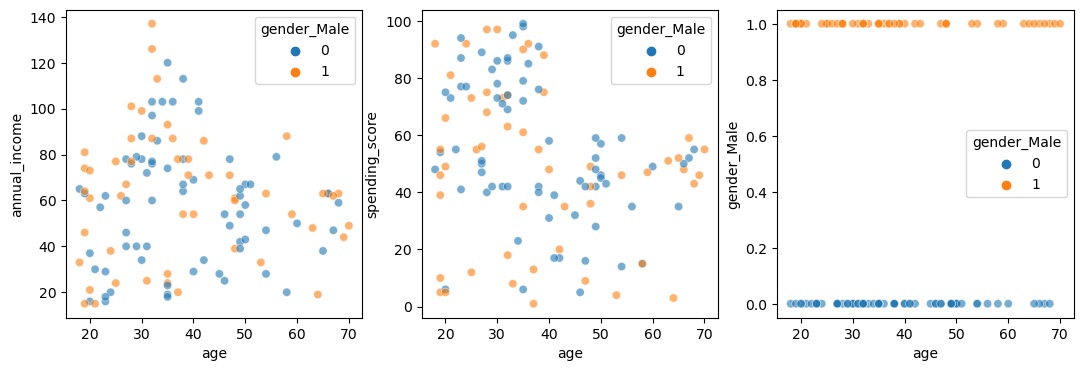

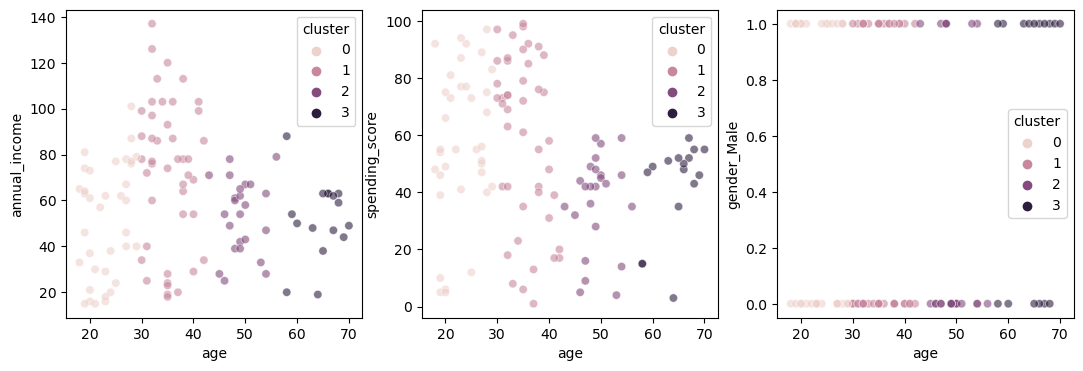

In [59]:
plt.figure(figsize=[13,4])
plt.subplot(131)
sns.scatterplot(data=train, x='age', y='annual_income', alpha=.6, hue='gender_Male')
plt.subplot(132)
sns.scatterplot(data=train, x='age', y='spending_score', alpha=.6, hue='gender_Male')
plt.subplot(133)
sns.scatterplot(data=train, x='age', y='gender_Male', alpha=.6, hue='gender_Male')
plt.show()
plt.figure(figsize=[13,4])
plt.subplot(131)
sns.scatterplot(data=train, x='age', y='annual_income', alpha=.6, hue='cluster')
plt.subplot(132)
sns.scatterplot(data=train, x='age', y='spending_score', alpha=.6, hue='cluster')
plt.subplot(133)
sns.scatterplot(data=train, x='age', y='gender_Male', alpha=.6, hue='cluster')
plt.show()

### 2. How does scaling impact the results of clustering?



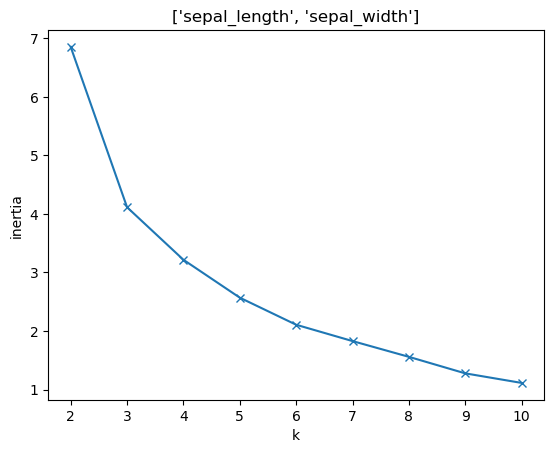

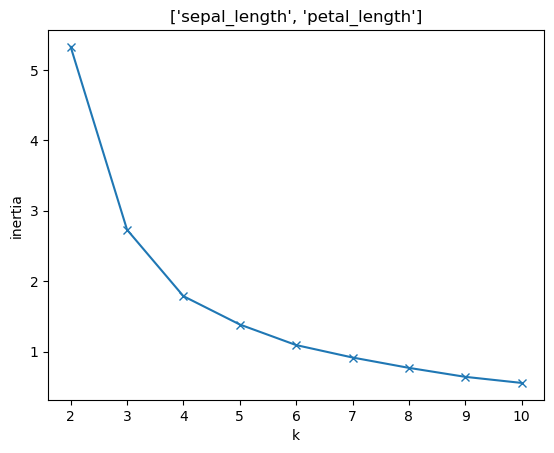

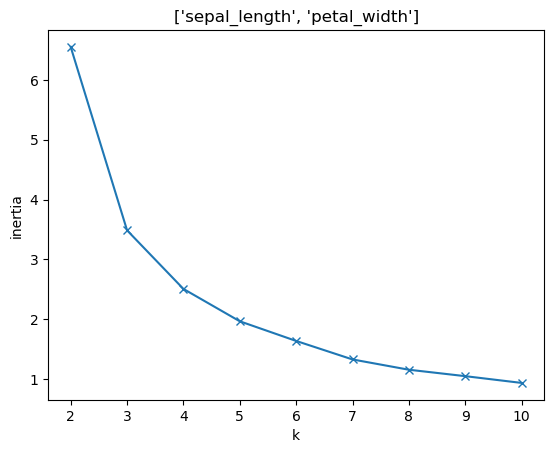

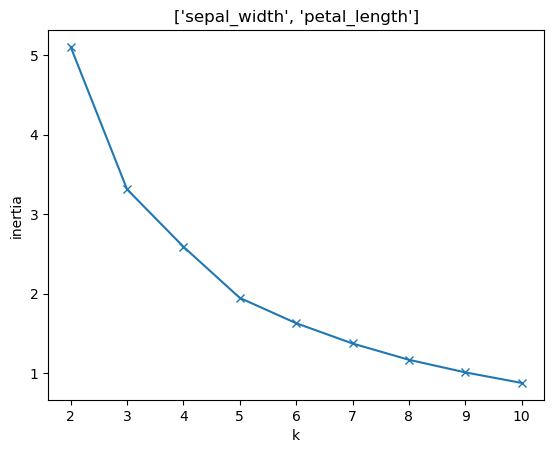

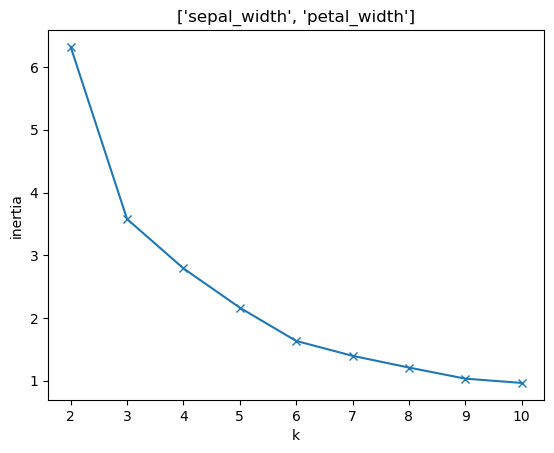

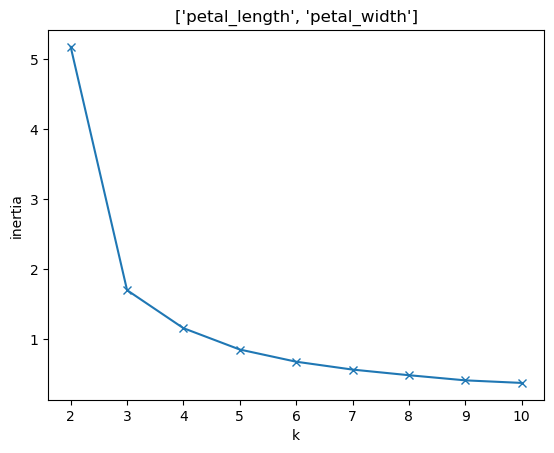

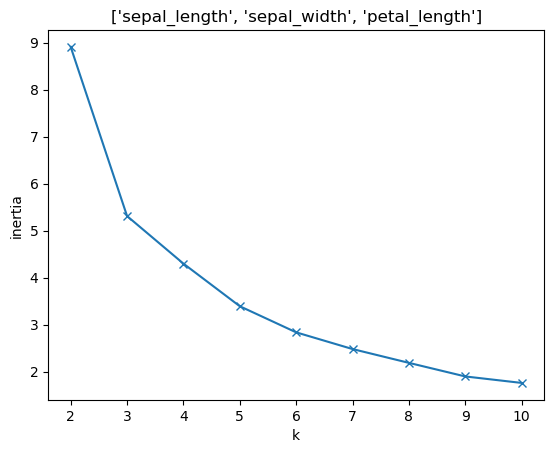

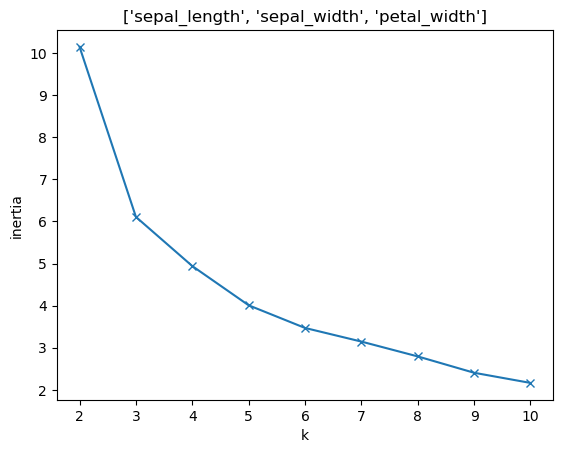

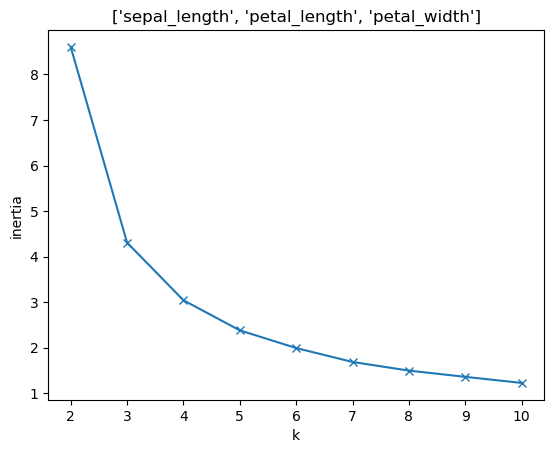

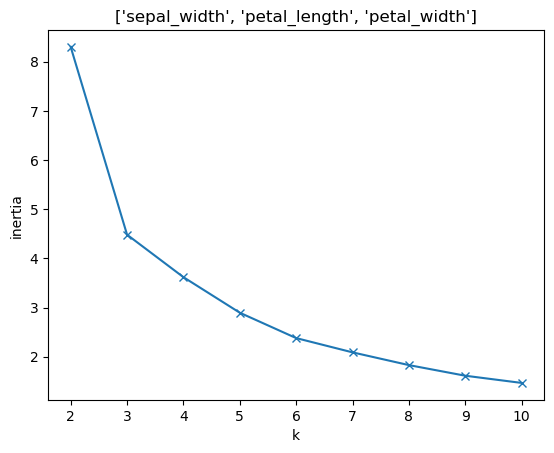

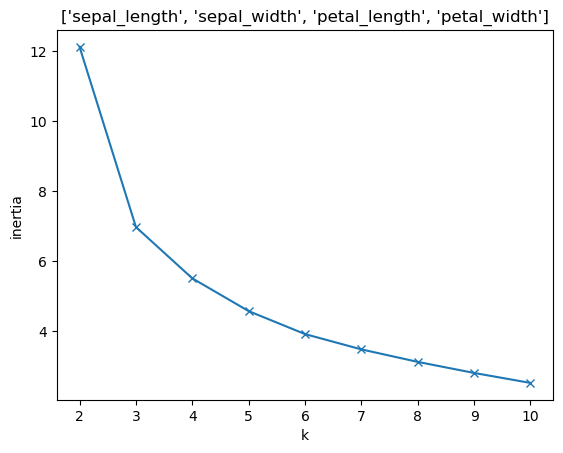

In [60]:
df = get_iris()
X = pd.DataFrame(MinMaxScaler().fit_transform(df.drop(columns='Species')), df.index, df.drop(columns='Species').columns)
for r in range(2,5):
    for feature in itertools.combinations(X.columns,r):
        f = list(feature)
        pd.Series({k:KMeans(k,random_state=42).fit(X[f]).inertia_ for k in range(2,11)}).plot(marker='x')
        plt.xticks(range(2,11))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title(f)
        plt.show()

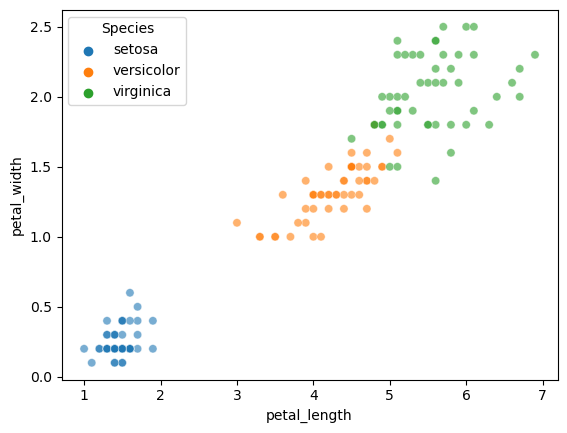

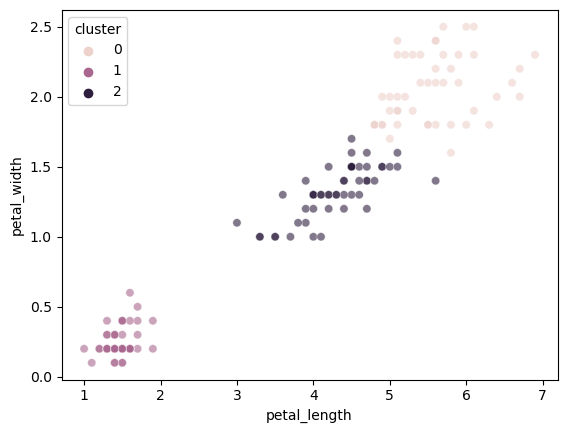

In [61]:
X = X[['petal_length','petal_width']]
km = KMeans(n_clusters=3,random_state=42)
km.fit(X)
df['cluster'] = km.predict(X)
sns.scatterplot(data=df, x='petal_length', y='petal_width', alpha=.6, hue='Species')
plt.show()
sns.scatterplot(data=df, x='petal_length', y='petal_width', alpha=.6, hue='cluster')
plt.show()

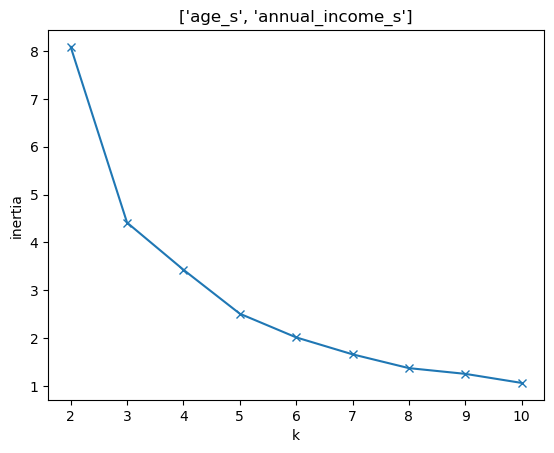

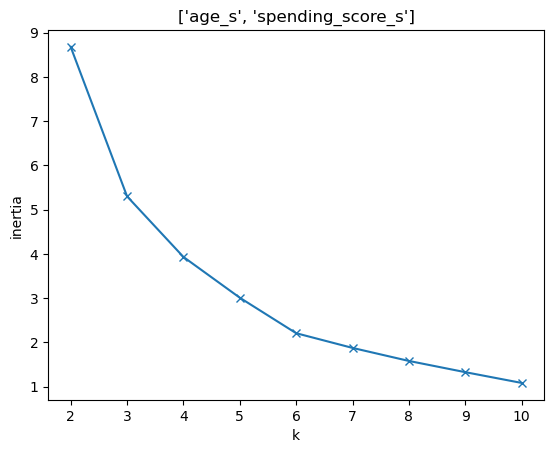

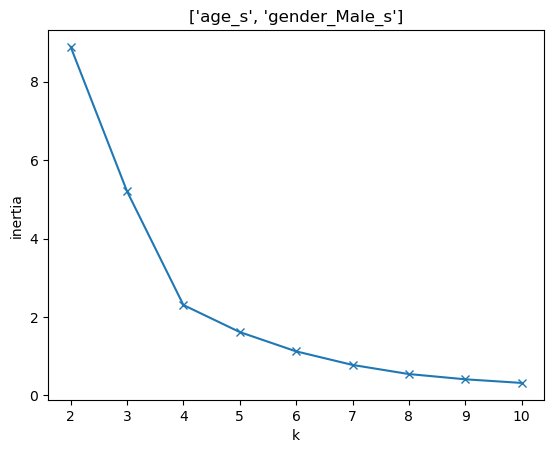

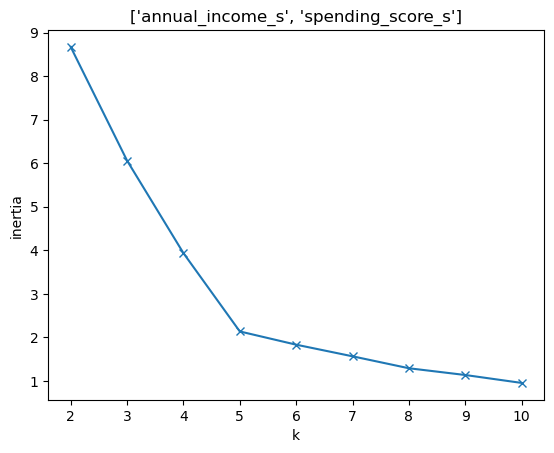

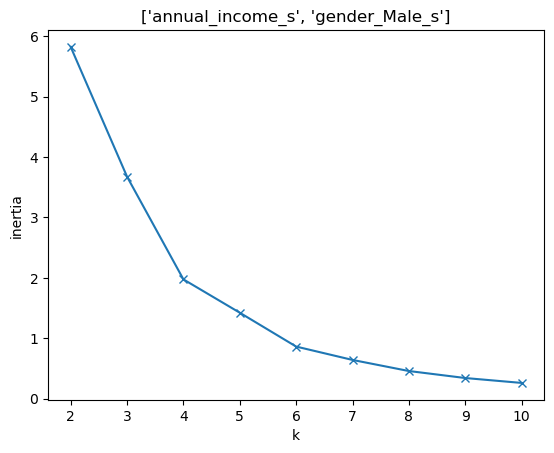

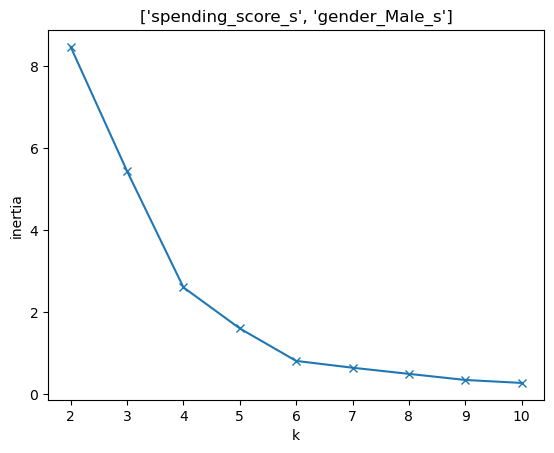

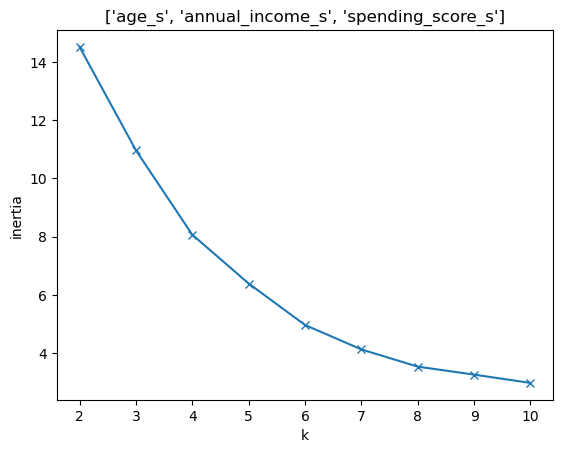

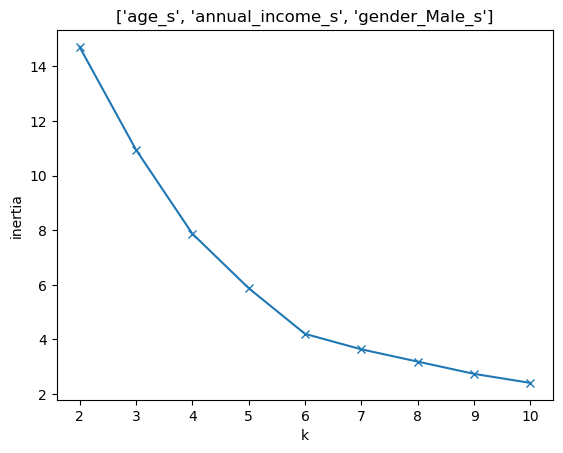

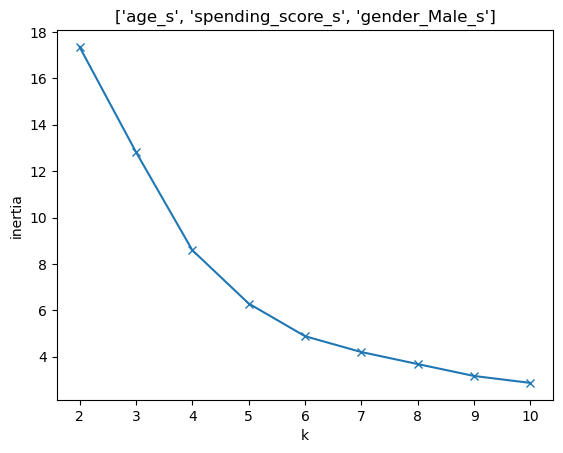

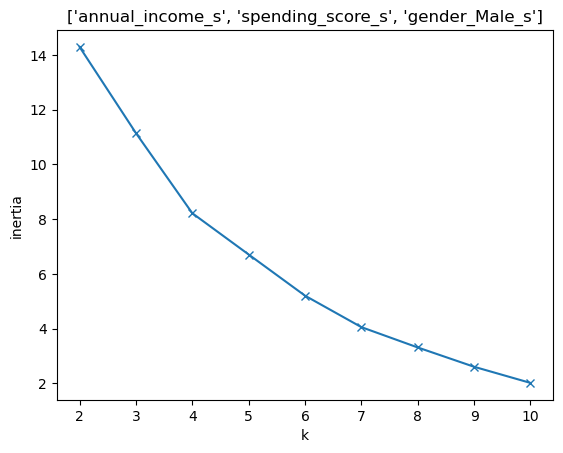

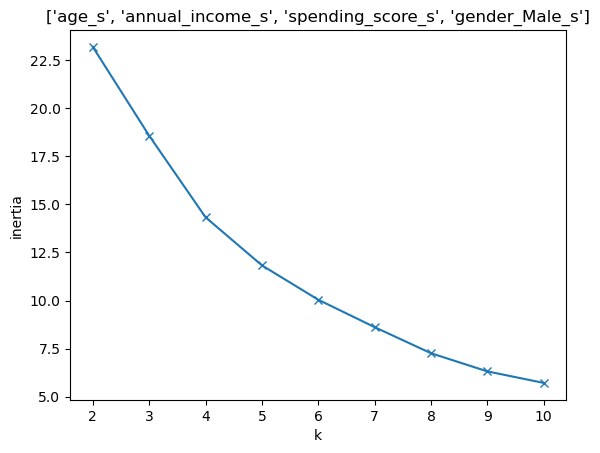

In [62]:
df = get_mall()
df = pd.get_dummies(df, columns=['gender'],drop_first=True)
df = df.drop(columns=['customer_id'])
train,val,test = w.split_data(df)
X = pd.DataFrame(MinMaxScaler().fit_transform(train), train.index, train.columns)
for col in X.columns:
    X = X.rename(columns={col: f'{col}_s'})
for r in range(2,5):
    for feature in itertools.combinations(X.columns,r):
        f = list(feature)
        pd.Series({k:KMeans(k,random_state=42).fit(X[f]).inertia_ for k in range(2,11)}).plot(marker='x')
        plt.xticks(range(2,11))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title(f)
        plt.show()

In [63]:
# 4 inc, gender
KMeans(n_clusters=4,random_state=42).fit(X[['annual_income_s','gender_Male_s']]).inertia_

1.9745203564350127

In [64]:
# 5 inc, gender
KMeans(n_clusters=5,random_state=42).fit(X[['annual_income_s','gender_Male_s']]).inertia_

1.4226721805979898

In [65]:
# 6 spend, gender
KMeans(n_clusters=6,random_state=42).fit(X[['spending_score_s','gender_Male_s']]).inertia_

0.8041362345566168

In [66]:
X1 = X[['annual_income_s','gender_Male_s']]
km = KMeans(n_clusters=4,random_state=42)
km.fit(X1)
X['cluster'] = km.predict(X1)
X['cluster'] = X['cluster'].astype(str)

In [67]:
X.head()

age_s  annual_income_s  spending_score_s  gender_Male_s cluster
42   0.576923         0.196721          0.357143            1.0       0
157  0.230769         0.516393          0.785714            0.0       1
155  0.173077         0.516393          0.897959            0.0       1
3    0.096154         0.008197          0.775510            0.0       3
99   0.038462         0.377049          0.489796            1.0       2

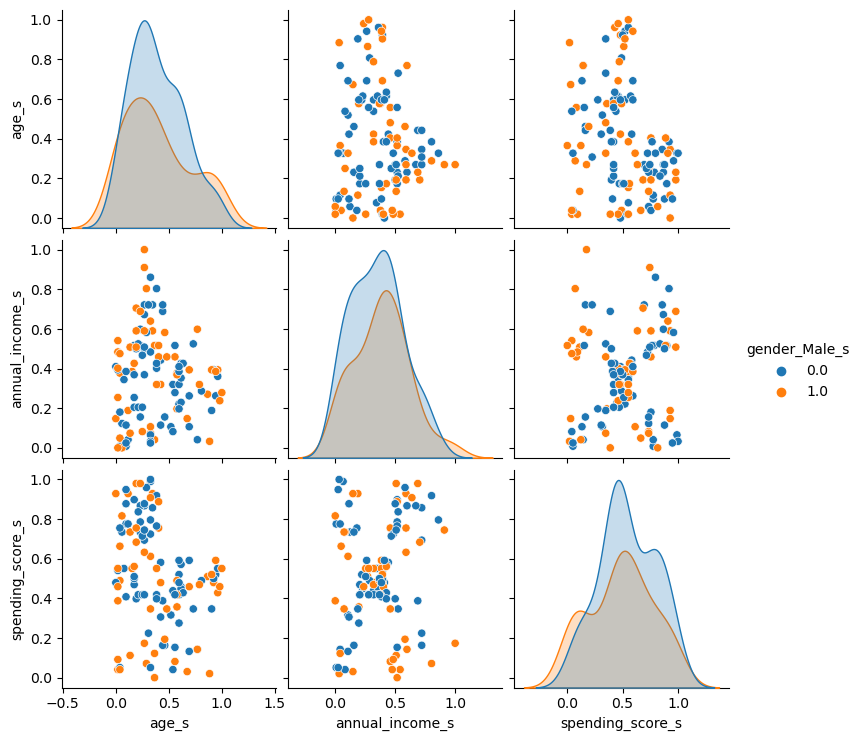

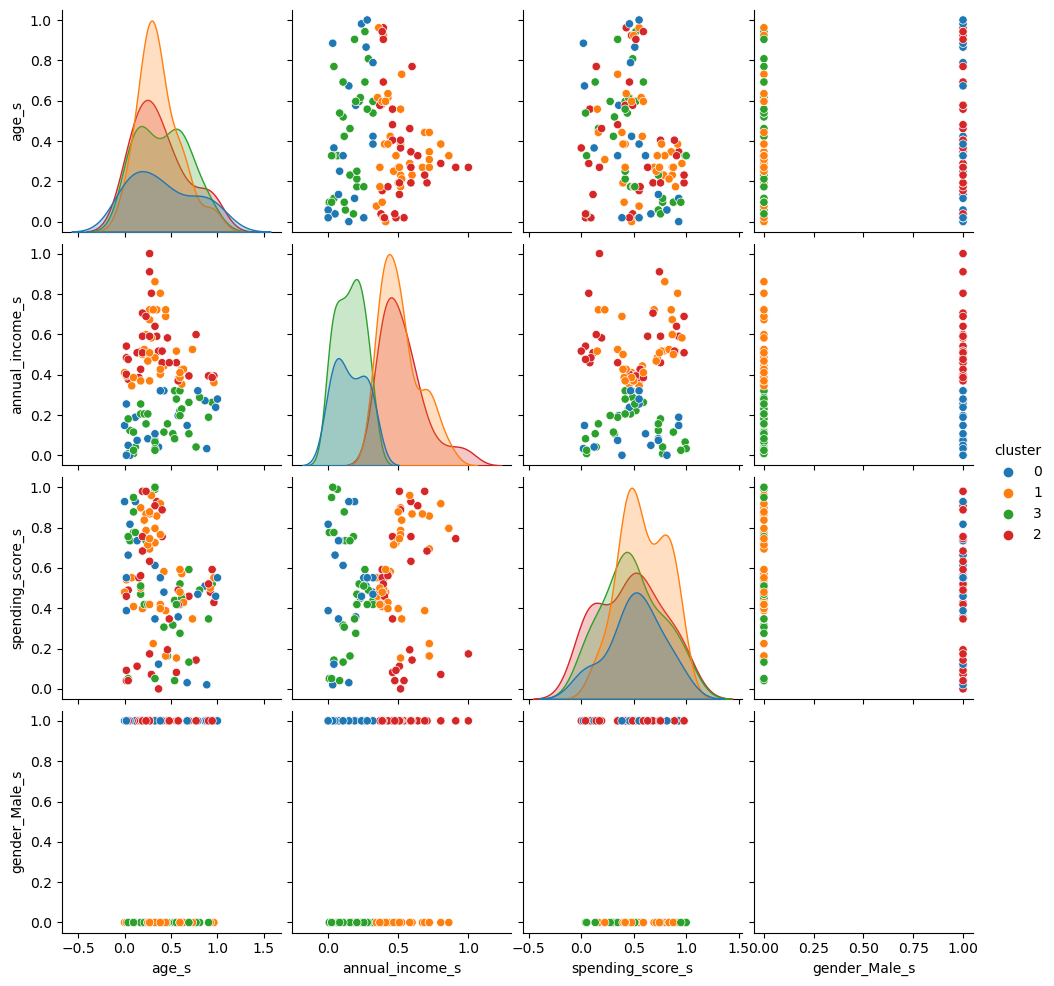

In [68]:
sns.pairplot(data=X,hue='gender_Male_s')
plt.show()
sns.pairplot(data=X,hue='cluster')
plt.show()

### 3. Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus). You can show how the resulting clusters differ either with descriptive statistics or visually.

Bonus
1. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
2. Visualize the data and guess the number and shape of the clusters.
3. Implement the KMeans algorithm on unscaled data and visualize the clusters.
4. Repeat the step above but with scaled data.
5. Write down the takeaways from this exercise.

In [69]:
sheet_url = "https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0"
url_1 = sheet_url.replace('/edit', '/export?format=csv&')
df = pd.read_csv(url_1)
df

x         y
0    -3.641747  0.121540
1    -7.620447  1.810897
2    -6.505373  0.068072
3     7.730963  0.585521
4    17.283668  0.344804
..         ...       ...
795   3.941363  5.807617
796   6.057122  6.010463
797   8.373651  4.641515
798  -2.058756  6.077125
799  11.039449  5.559096

[800 rows x 2 columns]

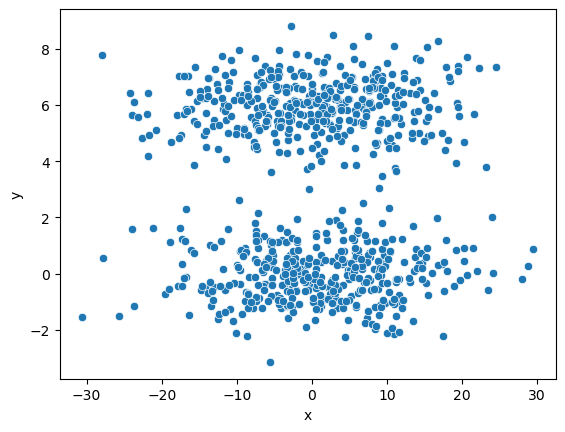

In [70]:
sns.scatterplot(data=df,x='x',y='y')
plt.show()

Text(0.5, 1.0, 'inertia change as k incr')

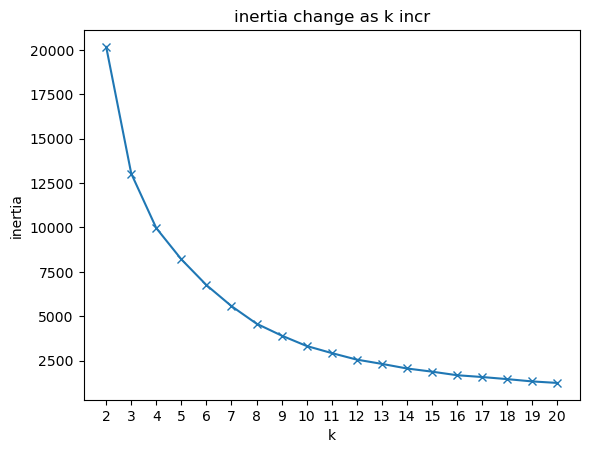

In [71]:
train,val,test = w.split_data(df)
pd.Series({k:KMeans(k,random_state=42).fit(train).inertia_ for k in range(2,21)}).plot(marker='x')
plt.xticks(range(2,21))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('inertia change as k incr')

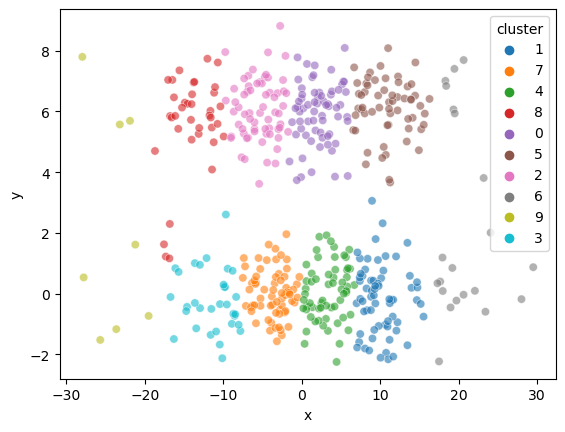

In [72]:
km = KMeans(n_clusters=10,random_state=42)
km.fit(train)
train['cluster'] = km.predict(train)
train.cluster = train.cluster.astype(str)
sns.scatterplot(data=train, x='x', y='y', alpha=.6, hue='cluster')
plt.show()

Text(0.5, 1.0, 'inertia change as k incr')

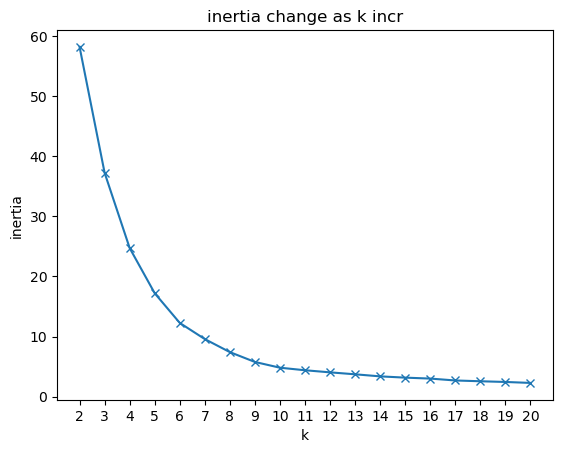

In [73]:
X = pd.DataFrame(MinMaxScaler().fit_transform(train), train.index, train.columns)
for col in X.columns:
    X = X.rename(columns={col: f'{col}_s'})
pd.Series({k:KMeans(k,random_state=42).fit(X).inertia_ for k in range(2,21)}).plot(marker='x')
plt.xticks(range(2,21))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('inertia change as k incr')

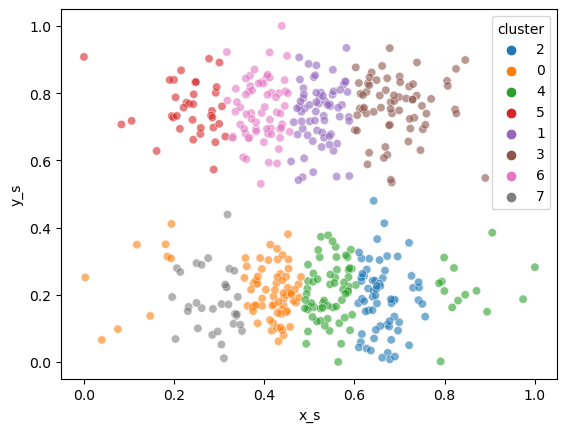

In [74]:
km = KMeans(n_clusters=8,random_state=42)
km.fit(X)
X['cluster'] = km.predict(X)
X.cluster = X.cluster.astype(str)
sns.scatterplot(data=X, x='x_s', y='y_s', alpha=.6, hue='cluster')
plt.show()

## test with zillow

In [75]:
df = w.wrangle_zillow()
df = w.clean_outliers_qtl(df)
df = df.drop(columns=['trx_date','transactiondate'])
df = w.encode(df)
train,val,test = w.split_data(df)
train

yearbuilt   age  old_home  bathroomcnt  bedroomcnt  roomcnt  \
40811     1989.0  28.0     False          2.5         3.0      5.0   
32812     1950.0  67.0      True          3.0         3.0      6.0   
67398     1923.0  94.0      True          1.0         2.0      3.0   
56020     2008.0   9.0     False          2.5         4.0      7.0   
42105     1953.0  64.0      True          2.0         3.0      5.0   
...          ...   ...       ...          ...         ...      ...   
64756     1961.0  56.0      True          3.0         4.0      7.0   
70587     1968.0  49.0      True          2.0         4.0      8.0   
67662     1967.0  50.0      True          2.0         2.0      4.0   
74795     1979.0  38.0      True          2.0         2.0      4.0   
6861      1958.0  59.0      True          1.0         2.0      3.0   

       garagecarcnt  has_garage  calculatedfinishedsquarefeet    latitude  \
40811           2.0        True                        1200.0  33572695.0   
32812           1.0        True                        2013.0  33635390.0   
67398           0.0       False                        1458.0  34168270.0   
56020           2.0        True                        2042.0  34249393.0   
42105           0.0       False                        1169.0  33789326.0   
...             ...         ...                           ...         ...   
64756           0.0       False                        2499.0  34165566.0   
70587           2.0        True                        1715.0  34232429.0   
67662           0.0       False                        1108.0  33986600.0   
74795           1.0        True                        1084.0  34270400.0   
6861            0.0       False                         896.0  34073360.0   

       ...  heatingorsystemdesc_Baseboard heatingorsystemdesc_Central  \
40811  ...                              0                           0   
32812  ...                              0                           0   
67398  ...                              0                           1   
56020  ...                              0                           0   
42105  ...                              0                           0   
...    ...                            ...                         ...   
64756  ...                              0                           1   
70587  ...                              0                           0   
67662  ...                              0                           1   
74795  ...                              0                           0   
6861   ...                              0                           0   

       heatingorsystemdesc_Floor/Wall  heatingorsystemdesc_Forced air  \
40811                               0                               0   
32812                               0                               0   
67398                               0                               0   
56020                               0                               0   
42105                               1                               0   
...                               ...                             ...   
64756                               0                               0   
70587                               0                               0   
67662                               0                               0   
74795                               0                               0   
6861                                1                               0   

      heatingorsystemdesc_Gravity heatingorsystemdesc_Heat Pump  \
40811                           0                             0   
32812                           0                             0   
67398                           0                             0   
56020                           0                             0   
42105                           0                             0   
...                           ...                           ...   
64756             

In [76]:
trains,vals,tests = w.std(train,val,test,scale=train.select_dtypes(exclude='object').columns)
trains.head()

yearbuilt_s     age_s  old_home_s  bathroomcnt_s  bedroomcnt_s  \
40811     0.863068 -0.863068   -1.821949       0.330867      0.018149   
32812    -0.849722  0.849722    0.548863       0.920925      0.018149   
67398    -2.035500  2.035500    0.548863      -1.439304     -0.986929   
56020     1.697504 -1.697504   -1.821949       0.330867      1.023227   
42105    -0.717969  0.717969    0.548863      -0.259190      0.018149   

       roomcnt_s  garagecarcnt_s  has_garage_s  \
40811  -0.255283        1.474353      1.352093   
32812   0.311065        0.389410      1.352093   
67398  -1.387978       -0.695533     -0.739594   
56020   0.877412        1.474353      1.352093   
42105  -0.255283       -0.695533     -0.739594   

       calculatedfinishedsquarefeet_s  latitude_s  ...  \
40811                       -0.632996   -1.602433  ...   
32812                        0.429205   -1.371108  ...   
67398                       -0.295914    0.595055  ...   
56020                        0.467094    0.894374  ...   
42105                       -0.673498   -0.803132  ...   

       heatingorsystemdesc_Baseboard_s  heatingorsystemdesc_Central_s  \
40811                           -0.013                      -0.880577   
32812                           -0.013                      -0.880577   
67398                           -0.013                       1.135619   
56020                           -0.013                      -0.880577   
42105                           -0.013                      -0.880577   

       heatingorsystemdesc_Floor/Wall_s  heatingorsystemdesc_Forced air_s  \
40811                         -0.474017                         -0.104562   
32812                         -0.474017                         -0.104562   
67398                         -0.474017                         -0.104562   
56020                         -0.474017                         -0.104562   
42105                          2.109627                         -0.104562   

       heatingorsystemdesc_Gravity_s  heatingorsystemdesc_Heat Pump_s  \
40811                      -0.006949                        -0.004913   
32812                      -0.006949                        -0.004913   
67398                      -0.006949                        -0.004913   
56020                      -0.006949                        -0.004913   
42105                      -0.006949                        -0.004913   

       heatingorsystemdesc_None_s  heatingorsystemdesc_Radiant_s  \
40811                   -0.029493                      -0.018387   
32812                   -0.029493                      -0.018387   
67398                   -0.029493                      -0.018387   
56020                   -0.029493                      -0.018387   
42105                   -0.029493                      -0.018387   

       heatingorsystemdesc_Solar_s  heatingorsystemdesc_Yes_s  
40811                    -0.038402                   1.316022  
32812                    -0.038402                   1.316022  
67398                    -0.038402                  -0.759866  
56020                    -0.038402                   1.316022  
42105                    -0.038402                  -0.759866  

[5 rows x 44 columns]

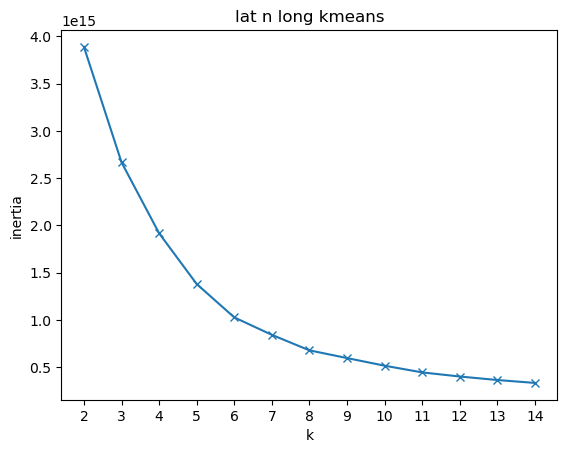

In [77]:
train_ll = train[['latitude','longitude']]
pd.Series({k:KMeans(k,random_state=42).fit(train_ll).inertia_ for k in range(2,15)}).plot(marker='x')
plt.xticks(range(2,15))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('lat n long kmeans')
plt.show()

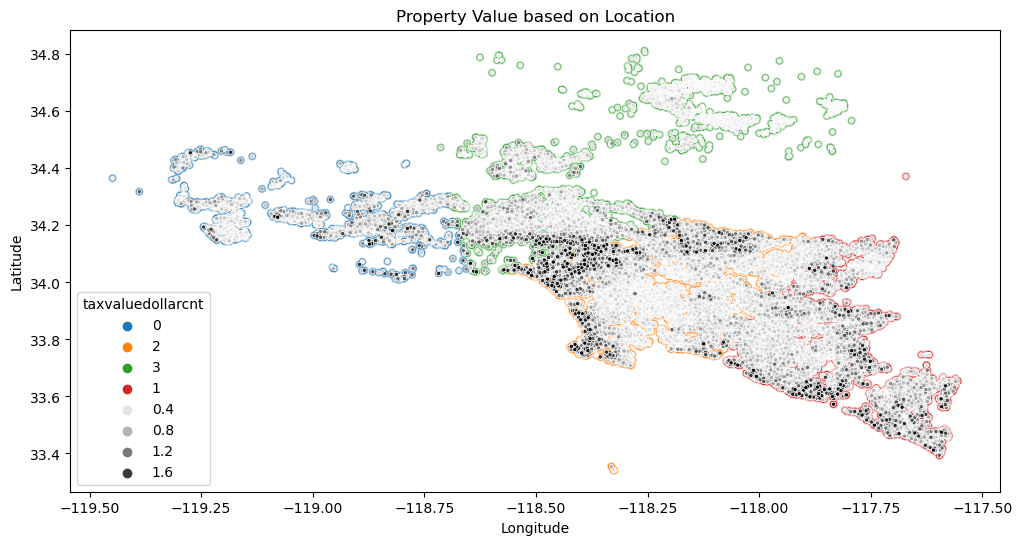

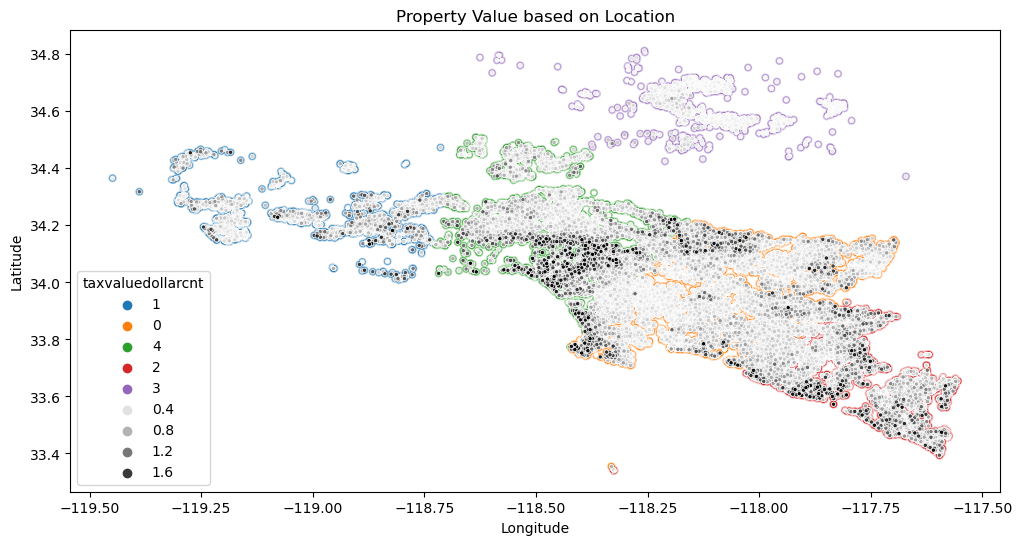

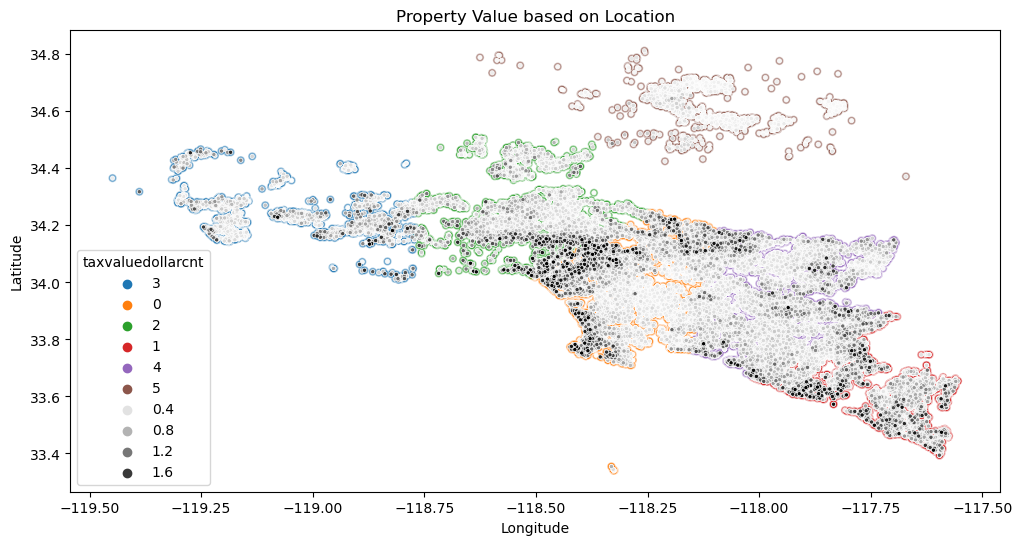

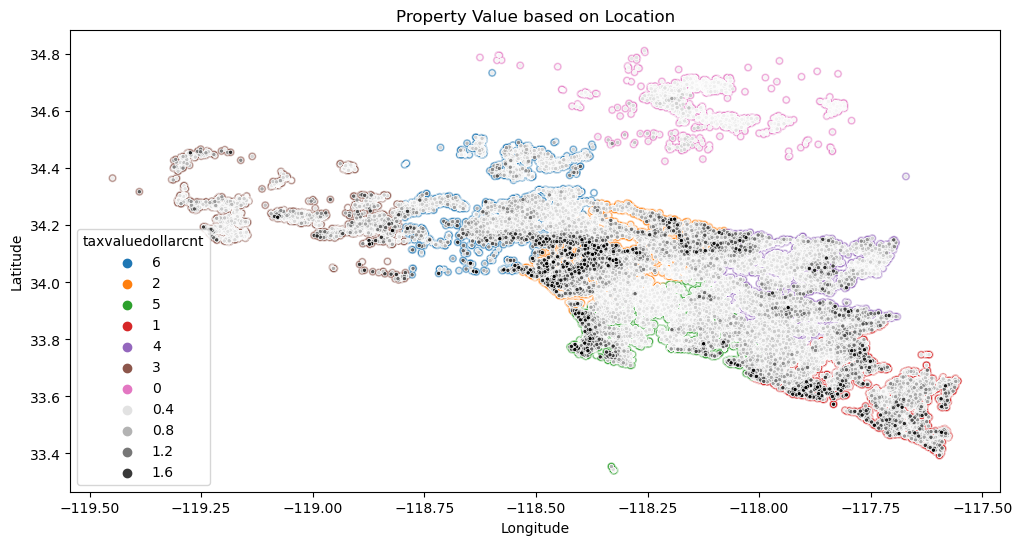

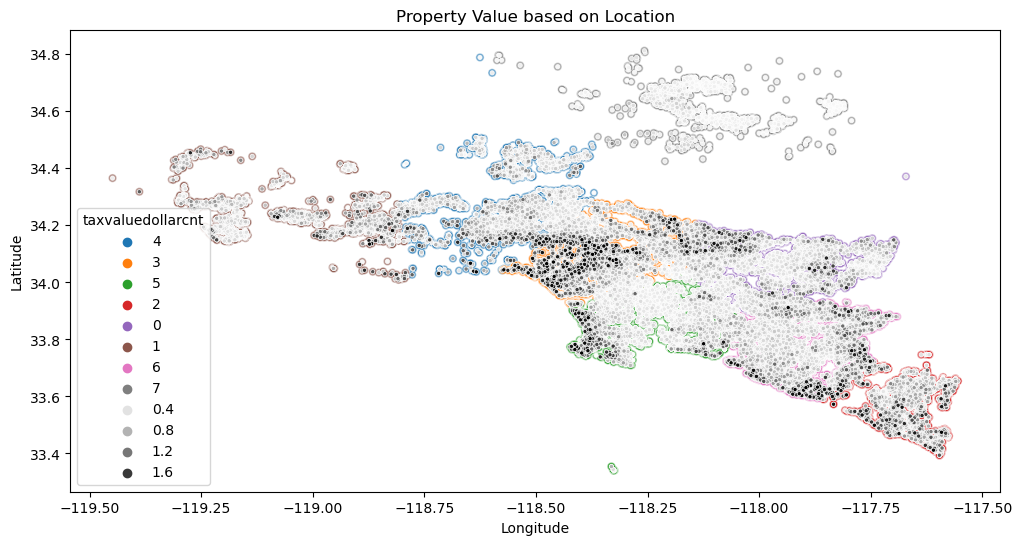

In [78]:
for n in [4,5,6,7,8]:
    km = KMeans(n_clusters=n,random_state=42)
    km.fit(train_ll)
    train_ll = train_ll.assign(cluster = km.predict(train_ll))
    train_ll.cluster = train_ll.cluster.astype(str)
    # make the size
    plt.figure(figsize=[12,6])
    # plot prop value based on lat long
    # make xy label scale smaller
    p = train.copy()
    p = p.assign(cluster=train_ll.cluster)
    p = p.assign(lat=p.latitude/1000000)
    p = p.assign(long=p.longitude/1000000)
    p = p.sort_values('taxvaluedollarcnt')
    # cluster kmeans
    sns.scatterplot(data=p, y='lat', x='long', alpha=.6, hue='cluster')
    # generic legend example
    sns.scatterplot(data=p,y='lat',x='long',hue='taxvaluedollarcnt',palette='Greys',alpha=1,marker='.')
    # label generic legend
    # plt.legend(title='Prop Value',labels=['','$400k','$800k','$1.2m','$1.6m'])
    # give it a name
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Property Value based on Location')
    plt.show()


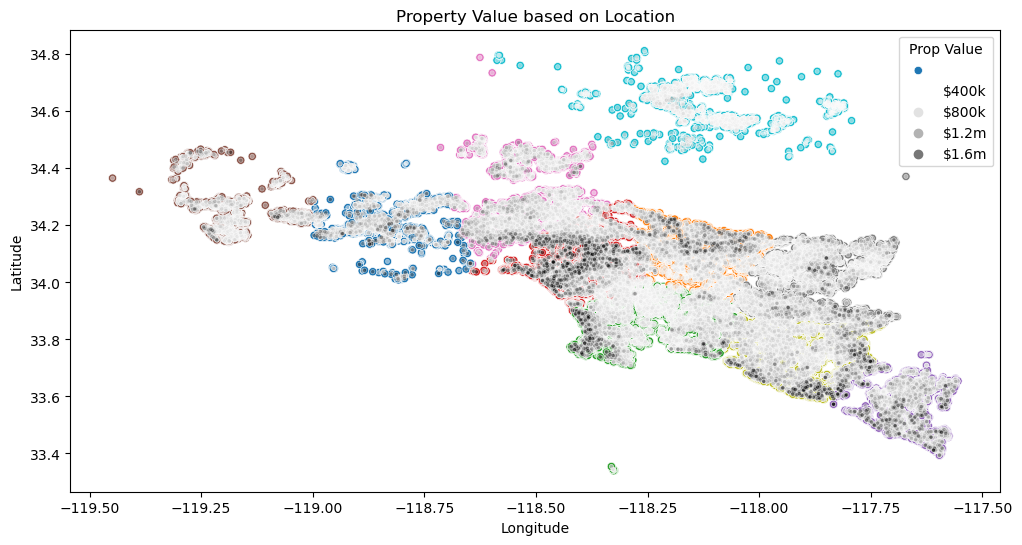

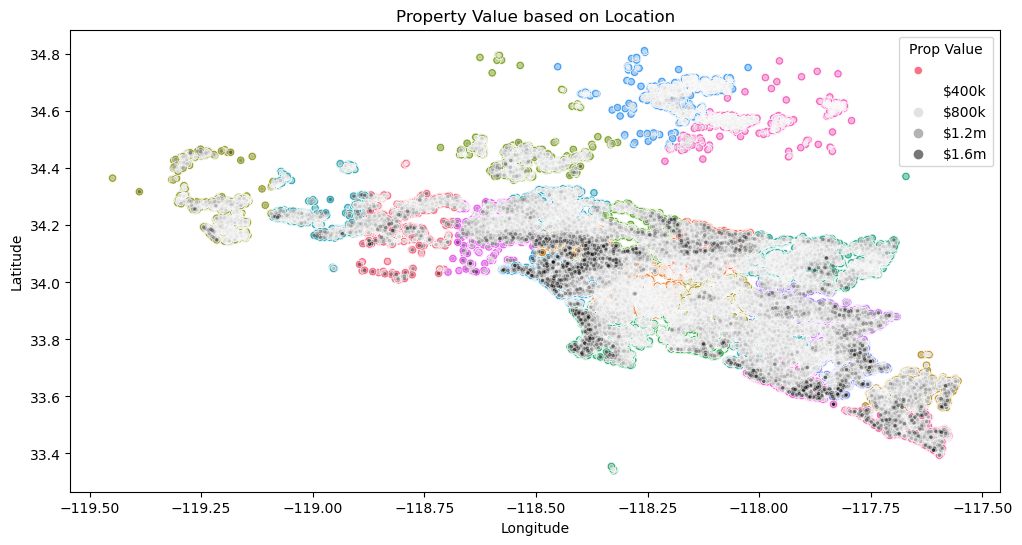

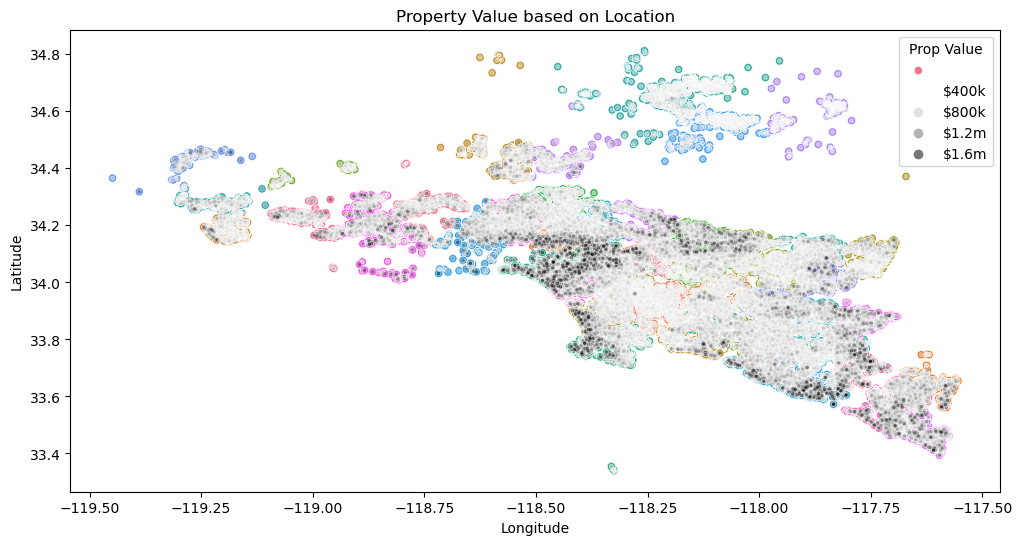

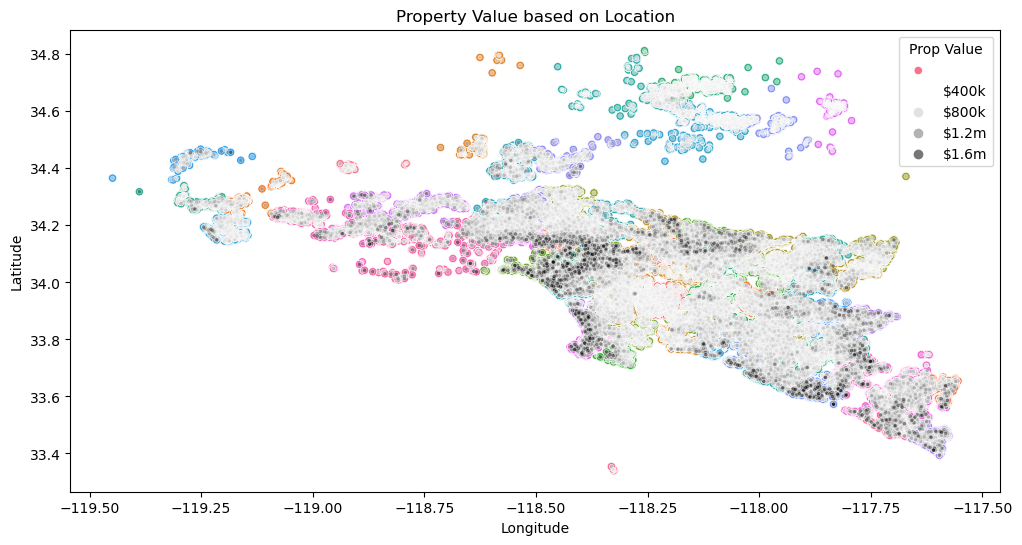

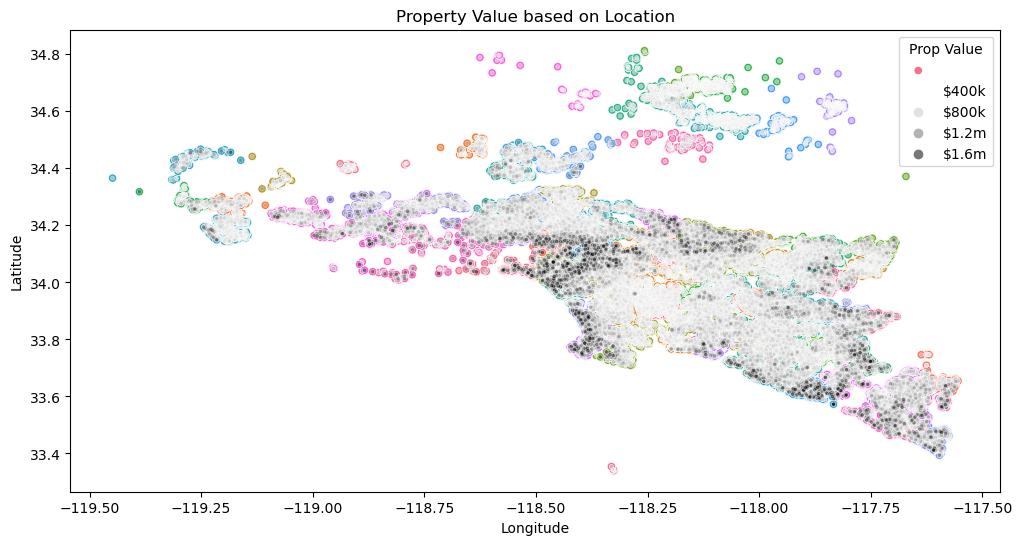

In [79]:
for n in [10,25,50,75,100]:
    km = KMeans(n_clusters=n,random_state=42)
    km.fit(train_ll)
    train_ll = train_ll.assign(cluster = km.predict(train_ll))
    train_ll.cluster = train_ll.cluster.astype(str)
    # make the size
    plt.figure(figsize=[12,6])
    # plot prop value based on lat long
    # make xy label scale smaller
    p = train.copy()
    p = p.assign(cluster=train_ll.cluster)
    p = p.assign(lat=p.latitude/1000000)
    p = p.assign(long=p.longitude/1000000)
    p = p.sort_values('taxvaluedollarcnt')
    # cluster kmeans
    sns.scatterplot(data=p, y='lat', x='long', hue='cluster',legend=False)
    # generic legend example
    sns.scatterplot(data=p,y='lat',x='long',hue='taxvaluedollarcnt',palette='Greys',alpha=.5,marker='.')
    # label generic legend
    plt.legend(title='Prop Value',labels=['','$400k','$800k','$1.2m','$1.6m'])
    # give it a name
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Property Value based on Location')
    plt.show()

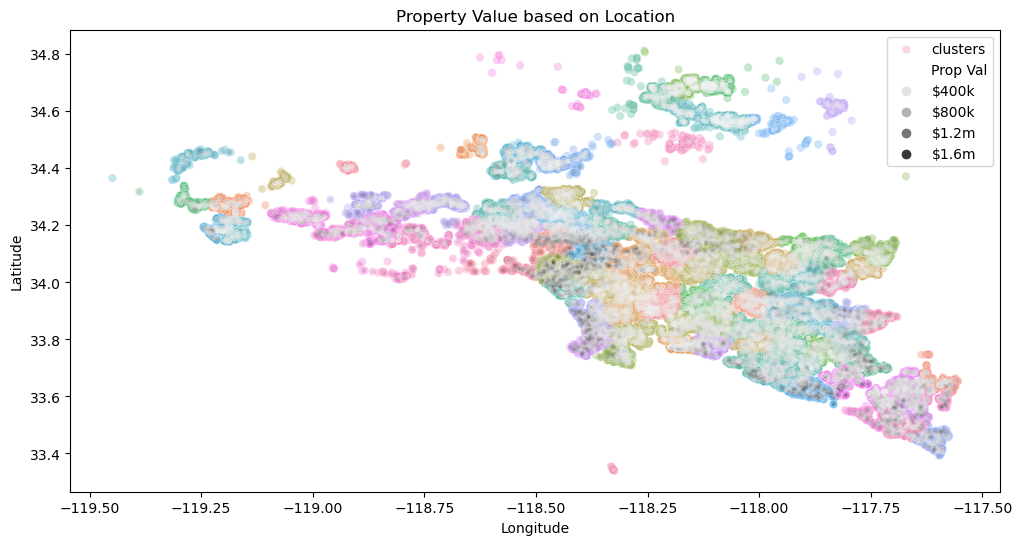

In [80]:
km = KMeans(n_clusters=100,random_state=42)
km.fit(train_ll)
train_ll = train_ll.assign(cluster = km.predict(train_ll))
train_ll.cluster = train_ll.cluster.astype(str)
# make the size
plt.figure(figsize=[12,6])
# plot prop value based on lat long
# make xy label scale smaller
p = train.copy()
p = p.assign(cluster=train_ll.cluster)
p = p.assign(lat=p.latitude/1000000)
p = p.assign(long=p.longitude/1000000)
p = p.sort_values('taxvaluedollarcnt')
# cluster kmeans
sns.scatterplot(data=p, y='lat', x='long', hue='cluster',alpha=.3,legend=False)
# generic legend example
sns.scatterplot(data=p,y='lat',x='long',hue='taxvaluedollarcnt',palette='Greys',alpha=.1,marker='.')
# label generic legend
plt.legend(labels=['clusters','Prop Val','$400k','$800k','$1.2m','$1.6m'])
# give it a name
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Value based on Location')
plt.show()

In [81]:
train_ll.head()

latitude    longitude cluster
40811  33572695.0 -117649605.0      54
32812  33635390.0 -117903032.0      72
67398  34168270.0 -118123898.0      14
56020  34249393.0 -119169951.0      66
42105  33789326.0 -118100010.0      20

In [82]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

# davies_bouldin_score(X,KMeans.labels_)
# calinski_harabasz_score(X,KMeans.labels_)
# silhouette_score(X, KMeans.labels_, metric='euclidean')

In [89]:
for n in [3,4,5,6,7,8]:
    km = KMeans(n_clusters=n,random_state=42)
    km.fit(train_ll)
    # train_ll = train_ll.assign(cluster = km.predict(train_ll))
    dbs = davies_bouldin_score(train_ll,km.labels_)
    chs = calinski_harabasz_score(train_ll,km.labels_)
    sls = silhouette_score(train_ll,km.labels_)
    print(f'clusters:{n}\ndbs:{dbs}\nchs:{chs}\nsls:{sls}\n')

clusters:3
dbs:0.7568791869894226
chs:45867.314043395185
sls:0.439744481882002

clusters:4
dbs:0.8801242935201352
chs:47967.23918871977
sls:0.39983046346665646

clusters:5
dbs:0.7030467061488487
chs:54016.893683262344
sls:0.4296919933798301

clusters:6
dbs:0.7434407085338882
chs:60943.84085724902
sls:0.4160011440377417

clusters:7
dbs:0.7452458325240381
chs:63455.358264902745
sls:0.4242156557349208

clusters:8
dbs:0.7386762755489192
chs:68986.98656410933
sls:0.42909210346064286



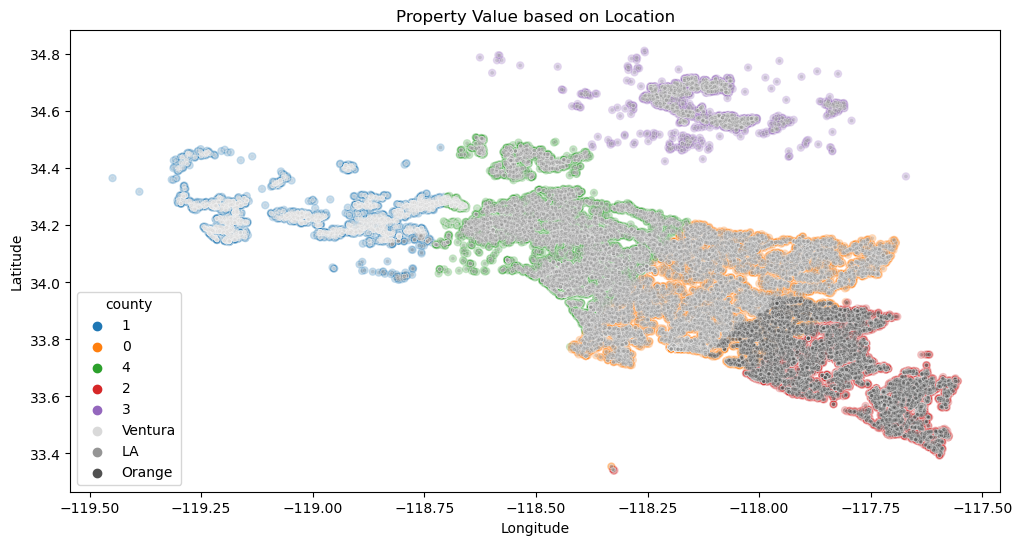

In [94]:
km = KMeans(n_clusters=5,random_state=42)
km.fit(train_ll)
train_ll = train_ll.assign(cluster = km.predict(train_ll))
train_ll.cluster = train_ll.cluster.astype(str)
# make the size
plt.figure(figsize=[12,6])
# plot prop value based on lat long
# make xy label scale smaller
p = train.copy()
p = p.assign(cluster=train_ll.cluster)
p = p.assign(lat=p.latitude/1000000)
p = p.assign(long=p.longitude/1000000)
p = p.sort_values('taxvaluedollarcnt')
# cluster kmeans
sns.scatterplot(data=p, y='lat', x='long', hue='cluster',alpha=.3,legend=True)
# generic legend example
sns.scatterplot(data=p,y='lat',x='long',hue='county',palette='Greys',alpha=.3,marker='.')
# label generic legend
# plt.legend(labels=['clusters','Prop Val','$400k','$800k','$1.2m','$1.6m'])
# give it a name
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Value based on Location')
plt.show()